# 作業：全新的神經網路練習

我們活在幸運的時代，機器學習被包裝成黑盒子，就算你完全不知到神經網路，也可以將 X, y 丟進神經網路去優化

下方有兩個 cell 依序為：


1. Attention 神經網路 layer
2. 含有 Attention 的 model


請將 u22-lstm.ipynb 當中的範例，全部複製過來，然後將當中的 LSTM 模型改成下方的神經網路模型，並且訓練、回測看看！


可以先將model 當作黑盒子，先不用理解 Attention Layer 是在做什麼也沒關係喔！

### 覺得想要深入研究再看 - Attention layer 的相關介紹：
* [論文網址：Attention is all you need](https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf)
* [比較簡單的文章介紹（中文）](https://www.itread01.com/content/1550070201.html)
* [比較簡單的文章介紹（英文）](http://mlexplained.com/2017/12/29/attention-is-all-you-need-explained/)
* [更簡單的文章介紹（中文）](https://medium.com/@cyeninesky3/attention-is-all-you-need-%E5%9F%BA%E6%96%BC%E6%B3%A8%E6%84%8F%E5%8A%9B%E6%A9%9F%E5%88%B6%E7%9A%84%E6%A9%9F%E5%99%A8%E7%BF%BB%E8%AD%AF%E6%A8%A1%E5%9E%8B-dcc12d251449)
* [英文影音教學](https://www.youtube.com/watch?v=EgCPRvgltoE)

# 開始寫作業囉！

## u22 產生 feature 和 label 的程式碼(請自行填寫)

In [8]:
# u22-lstm.ipynb 當中的程式碼 （preprocessing）
from finlab.data import Data
import pandas as pd

data = Data()
twii = data.get("發行量加權股價指數")
twii = twii['台股指數'].resample("15T").first().dropna()

import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) / twii,
})

feature_names = list(dataset.columns[:-1])

print("before dropping NaN", dataset.shape)
dataset = dataset.dropna()
print("after dropping NaN", dataset.shape)

import lightgbm as lgb
dataset_train = dataset[:'2022']

gbm = lgb.LGBMClassifier(n_estimators=100, random_state=5, learning_rate=0.01)

gbm.fit(dataset_train[feature_names], dataset_train['return'] > 1)


from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()


import tqdm

n = 3

X = []
y = []
indexes = []
dataset_scaled_x = dataset_scaled[feature_names]

for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
    X.append(dataset_scaled_x.iloc[i:i+n].values)
    y.append(dataset_scaled['return'].iloc[i+n-1])
    indexes.append(dataset_scaled.index[i+n-1])
#dataset_scaled.head()

import numpy as np
X = np.array(X)
y = np.array(y)
indexes = np.array(indexes)

before dropping NaN (4263, 43)
after dropping NaN (2335, 43)


C:\Users\orang\.conda\envs\finlab\lib\site-packages\ipykernel_launcher.py:118: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2332 [00:00<?, ?it/s]

## 神經網路 Model （完全不用改）

In [9]:
# from tensorflow.keras.engine.topology import Layer
from tensorflow.keras.layers import Layer
from tensorflow.keras import initializers, regularizers, constraints
from tensorflow.keras import backend as K


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape = (input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape =(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

from tensorflow import keras

input_shape = X[0].shape # 還沒有 X ，請自己試試看！（參考u22-lstm.ipynb）
SEQ_LEN = input_shape[0]

model = keras.models.Sequential()

model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))
#model.add(keras.layers.Dropout(0.8))
#model.add(keras.layers.BatchNormalization())
model.add(Attention(SEQ_LEN))
model.add(keras.layers.Dense(32, activation="relu"))
#model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.Dense(1))
model.compile(optimizer=keras.optimizers.Adam(0.0005), loss='binary_crossentropy' , metrics = ['accuracy'])



## 神經網路訓練（完全不用改）

In [10]:
import datetime
X_train = X[indexes < datetime.datetime(2022, 1, 1)]
y_train = y[indexes < datetime.datetime(2022, 1, 1)]


get_best_model = keras.callbacks.ModelCheckpoint(
    filepath="./tmp/checkpoint_hw_4_1",
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


history = model.fit(
    X_train,  
    y_train > 1, 
    batch_size=2000, 
    epochs=10,
    validation_split=0.2, 
    callbacks=[get_best_model])


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 7.3330 - accuracy: 0.4110 - val_loss: 6.1928 - val_accuracy: 0.3005
Epoch 2/10
1/1 [==============================] - 0s 75ms/step - loss: 6.2867 - accuracy: 0.4110 - val_loss: 6.7194 - val_accuracy: 0.3005
Epoch 3/10
1/1 [==============================] - 0s 69ms/step - loss: 5.4940 - accuracy: 0.4110 - val_loss: 7.4586 - val_accuracy: 0.3005
Epoch 4/10
1/1 [==============================] - 0s 75ms/step - loss: 4.9670 - accuracy: 0.4110 - val_loss: 8.0343 - val_accuracy: 0.3005
Epoch 5/10
1/1 [==============================] - 0s 71ms/step - loss: 4.4901 - accuracy: 0.4110 - val_loss: 8.3149 - val_accuracy: 0.3005
Epoch 6/10
1/1 [==============================] - 0s 66ms/step - loss: 4.0517 - accuracy: 0.4110 - val_loss: 8.6594 - val_accuracy: 0.3005
Epoch 7/10
1/1 [==============================] - 0s 68ms/step - loss: 3.7225 - accuracy: 0.4110 - val_loss: 8.9760 - val_accuracy: 0.3005
Epoch 8/10
1/1 [=============

## u22-lstm.ipynb 的程式碼（驗證、回測）

73/73 [==============================] - 0s 2ms/step


<AxesSubplot:>

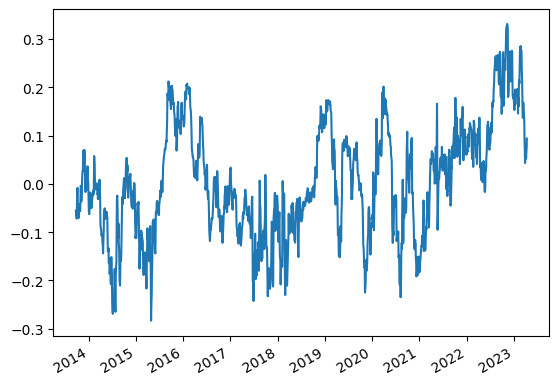

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# u22-lstm 程式碼(evaluation and backtest)
model.load_weights("./tmp/checkpoint_hw_4_1")
ey = model.predict(X)
ey = pd.Series(ey.swapaxes(0,1)[0], index=indexes)
ey.plot()


<AxesSubplot:xlabel='date'>

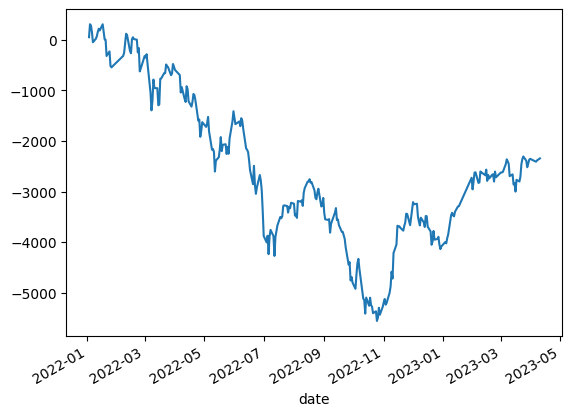

In [12]:
eq = twii[indexes]
returns = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.6)).rolling(10).sum() > 0
signal = signal.shift(1).fillna(False)

eq = (returns[signal]['2022':]).cumsum()
eq.plot()

In [13]:
signal.tail(50)

2023-01-13    True
2023-01-16    True
2023-01-17    True
2023-01-30    True
2023-01-31    True
2023-02-01    True
2023-02-02    True
2023-02-03    True
2023-02-06    True
2023-02-07    True
2023-02-08    True
2023-02-09    True
2023-02-10    True
2023-02-13    True
2023-02-14    True
2023-02-15    True
2023-02-16    True
2023-02-17    True
2023-02-20    True
2023-02-21    True
2023-02-22    True
2023-02-23    True
2023-02-24    True
2023-03-01    True
2023-03-02    True
2023-03-03    True
2023-03-06    True
2023-03-07    True
2023-03-08    True
2023-03-09    True
2023-03-10    True
2023-03-13    True
2023-03-14    True
2023-03-15    True
2023-03-16    True
2023-03-17    True
2023-03-20    True
2023-03-21    True
2023-03-22    True
2023-03-23    True
2023-03-24    True
2023-03-27    True
2023-03-28    True
2023-03-29    True
2023-03-30    True
2023-03-31    True
2023-04-06    True
2023-04-07    True
2023-04-10    True
2023-04-11    True
dtype: bool